## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# finding null percentage in each column
def get_null_percentage():
    return round(100 * df.isnull().sum()/df.shape[0], 2)
null_counts = get_null_percentage()
null_counts

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [5]:
#observe the different feature type present in the data

df[df['Class'] == 0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [6]:

df[df['Class'] == 1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()

normal_count = classes[0]
fraud_count = classes[1]

normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


In [8]:
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


Text(0, 0.5, 'Count')

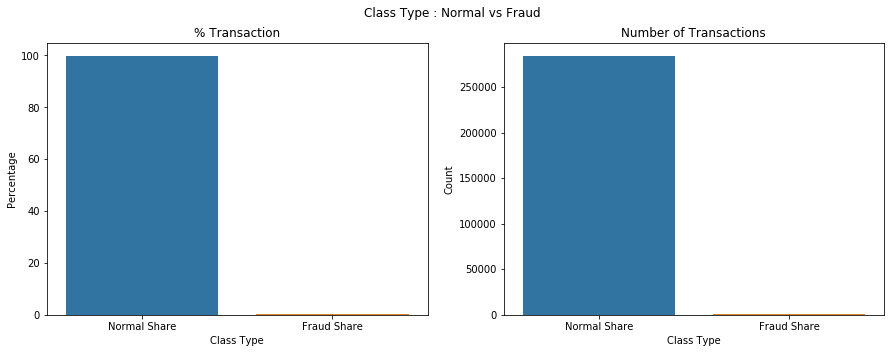

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# Set figure attributes
fig = plt.figure(figsize=(15,5))
fig.suptitle('Class Type : Normal vs Fraud')

plt.subplot(1,2,1)
data = pd.DataFrame([['Normal Share', normal_share], ['Fraud Share', fraud_share]], columns = ['Class Type', 'Percentage'])
ax = sns.barplot(x = 'Class Type', y='Percentage', data=data)
ax.set_title('% Transaction')
ax.set_xlabel('Class Type')
ax.set_ylabel('Percentage')

plt.subplot(1,2,2)
data1 = pd.DataFrame([['Normal Share', normal_count], ['Fraud Share', fraud_count]], columns = ['Class Type', 'Count'])
axp = sns.barplot(x = 'Class Type', y='Count', data=data1)
axp.set_title('Number of Transactions')
axp.set_xlabel('Class Type')
axp.set_ylabel('Count')

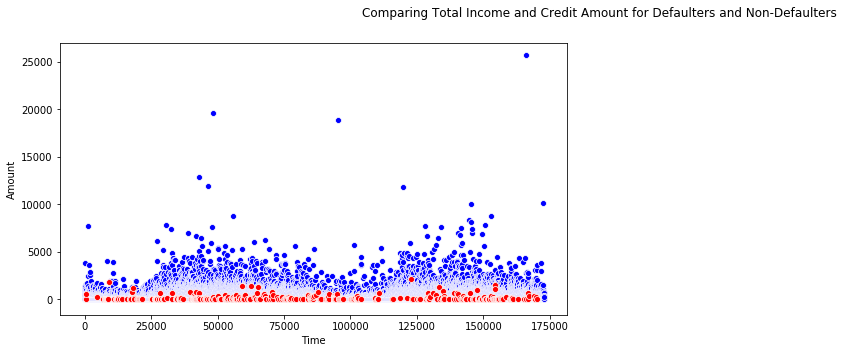

In [10]:
# Create a scatter plot to observe the distribution of classes with time and Amount
fig = plt.figure(figsize=(20,5))
fig.suptitle('Comparing Total Income and Credit Amount for Defaulters and Non-Defaulters')
plt.subplot(1,2,1)
ax = sns.scatterplot(df['Time'][df['Class'] == 0], df['Amount'][df['Class']==0], data = data, color='b')
ax = sns.scatterplot(df['Time'][df['Class'] == 1], df['Amount'][df['Class']==1], data = data, color='r')

In [11]:
df['Amt_log'] = np.log(df.Amount + 0.01)


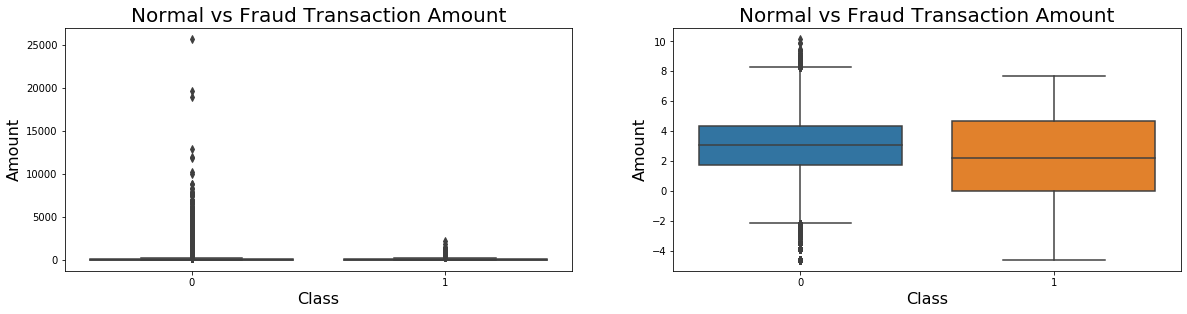

In [12]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount", data=df)
ax.set_title("Normal vs Fraud Transaction Amount", fontsize=20)
ax.set_xlabel("Class", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amt_log", data=df)
ax1.set_title("Normal vs Fraud Transaction Amount", fontsize=20)
ax1.set_xlabel("Class", fontsize=16)
ax1.set_ylabel("Amount", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount

In [14]:
from sklearn.preprocessing import StandardScaler

df['normAmt'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
data = df.drop(['Time', 'Amount', 'Amt_log'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Splitting the data into train & test data

In [15]:
y= data['Class'] #class variable
y.head()

# Putting features to X
X = data.drop(['Class'], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, stratify = y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

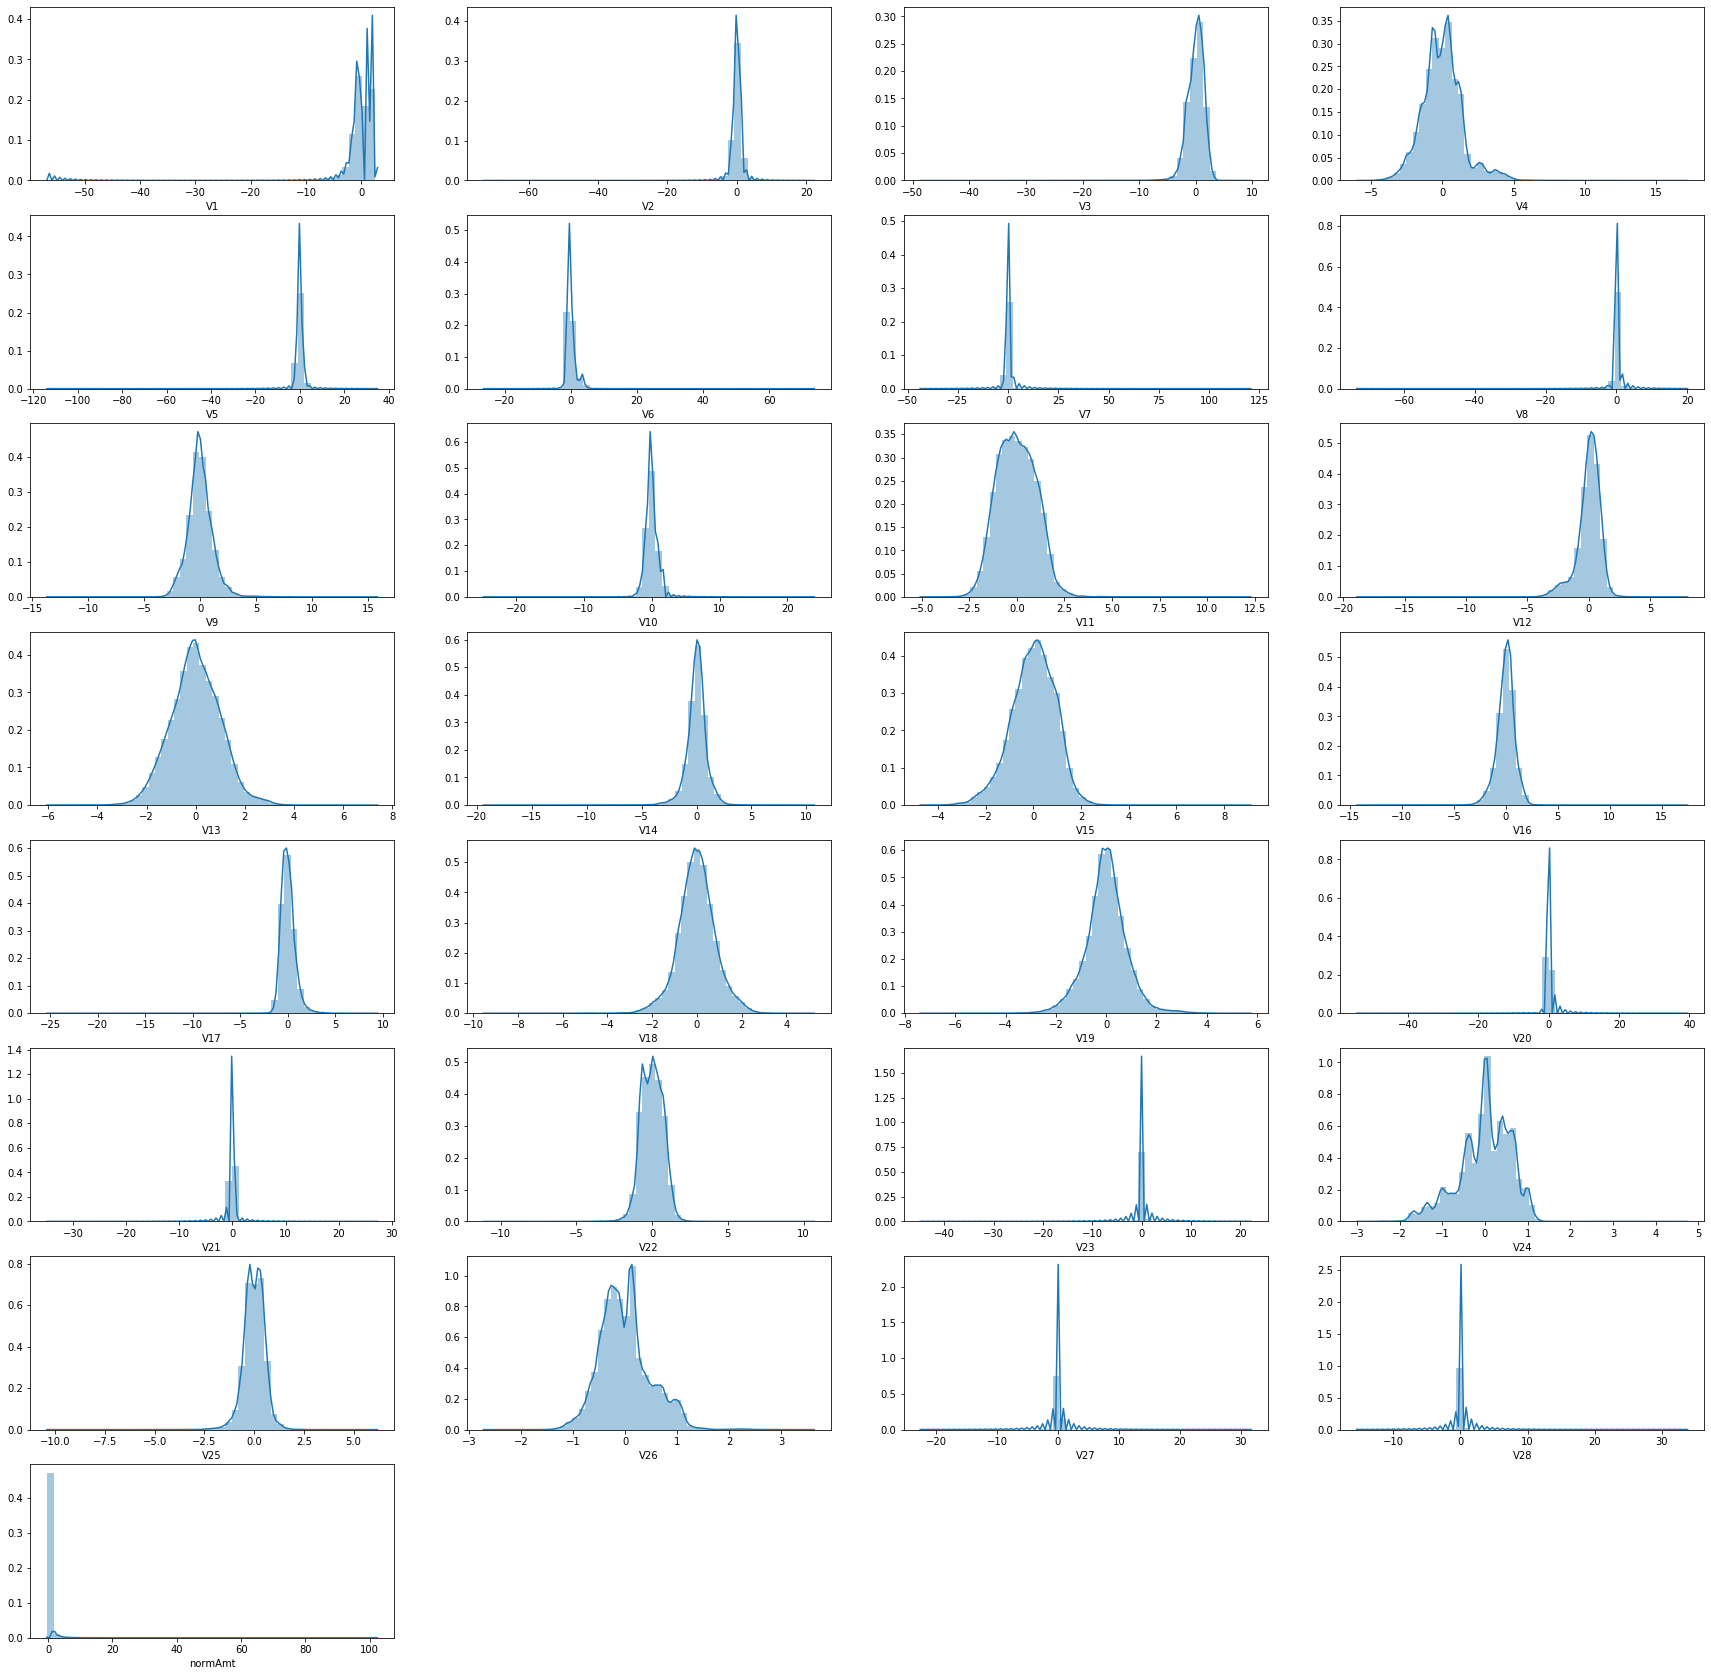

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
fig = plt.figure(figsize=(30,30))
fig.tight_layout()
i=1
for col in X_train.columns:
    plt.subplot(8,4,i)
    i=i+1
    sns.distplot(X_train[col])
    
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
from sklearn.preprocessing import PowerTransformer

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
columns= X.columns
pt = PowerTransformer()
X_train = pd.DataFrame(pt.fit_transform(X_train), columns=columns)
X_test = pd.DataFrame(pt.transform(X_test), columns=columns)

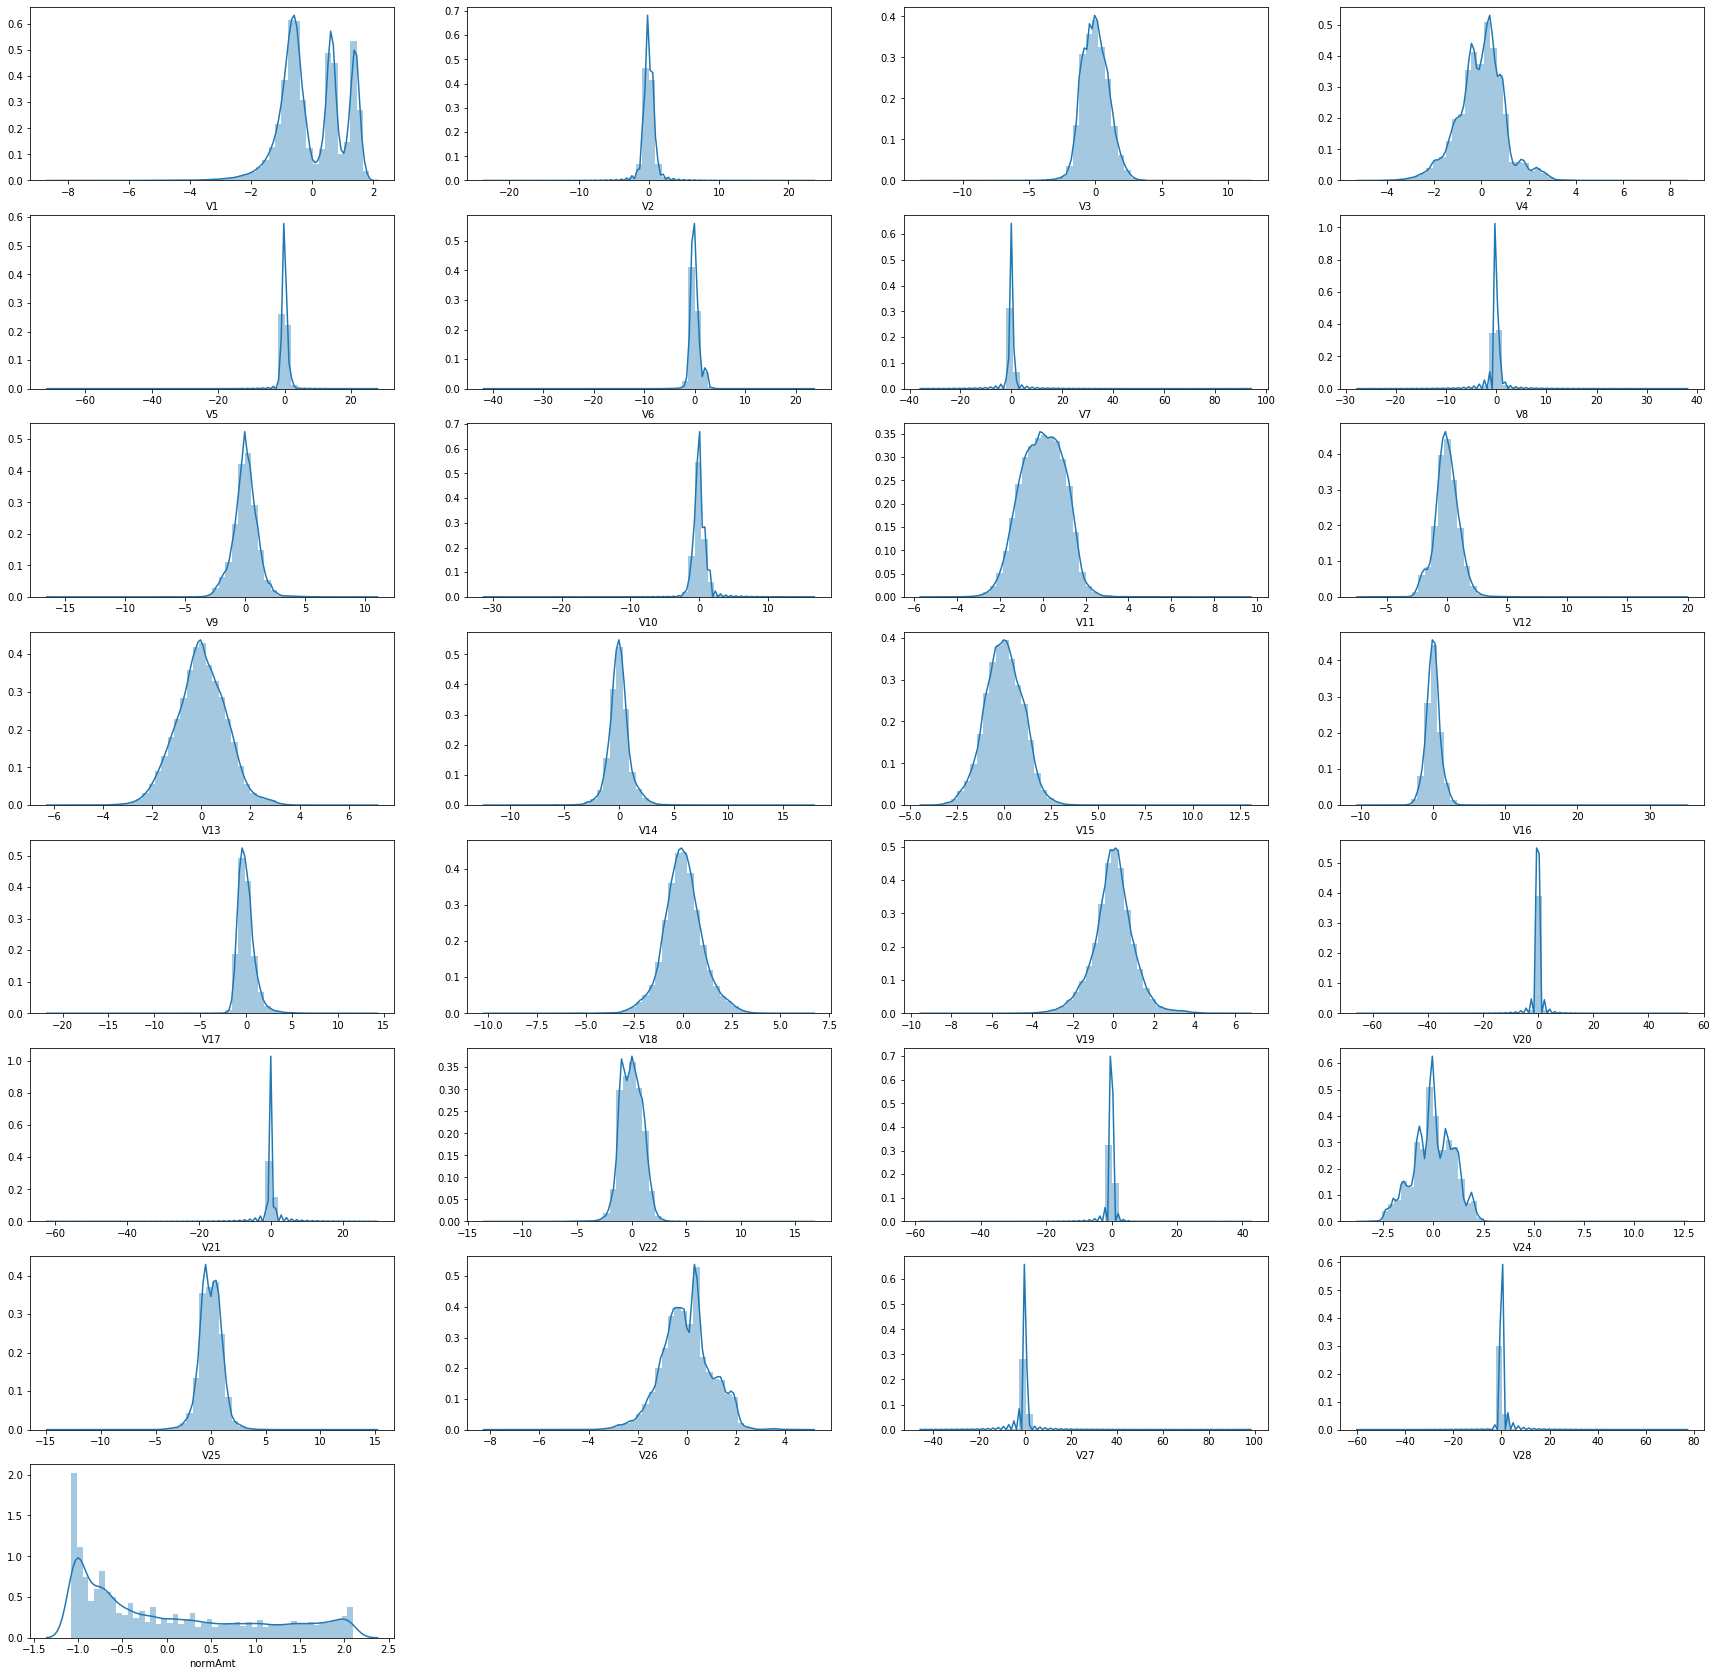

In [21]:
# plot the histogram of a variable from the dataset again to see the result
fig = plt.figure(figsize=(30,30))
fig.tight_layout()
i=1
for col in X_train.columns:
    plt.subplot(8,4,i)
    i=i+1
    sns.distplot(X_train[col])
    
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [22]:
# Logistic Regression
from sklearn import linear_model #import the package

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [23]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [24]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(--> #print the evaluation score on the X_test by choosing the best evaluation metric)? (<ipython-input-24-03f3db1ef6b7>, line 3)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE

## Model Building
- Build different models on the balanced dataset and see the result

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package

num_C = np.logspace(0,4,10)   #--> list of values
cv_num = [3, 5, 7]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

## Random Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [27]:
print('Original dataset shape %s' % Counter(y))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


### Logistic Regression

In [28]:
logistic = LogisticRegression(solver='liblinear')

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.0001, 0.001, 0.01, 0.1, 0.5]
k_fold = StratifiedKFold(n_splits=5)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(logistic, hyperparameters, cv=k_fold, verbose=0)

In [29]:
best_model = clf.fit(X_res, y_res)

In [30]:
#View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.5


In [31]:
y_train_pred_prob = best_model.predict_proba(X_res)
y_train_pred_prob = pd.Series(y_train_pred_prob[:,1])

In [32]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

In [33]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

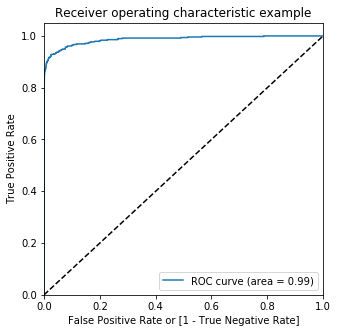

In [34]:
draw_roc(y_res, y_train_pred_prob)

In [35]:
# Let's create columns with different probability cutoffs 
pred_prob_df = pd.DataFrame()
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_prob_df[i]= y_train_pred_prob.map(lambda x: 1 if x > i else 0)
pred_prob_df.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [36]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_res, pred_prob_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.888745  0.983613  0.793877
0.2   0.2  0.933275  0.961128  0.905422
0.3   0.3  0.942699  0.939148  0.946250
0.4   0.4  0.947393  0.928889  0.965897
0.5   0.5  0.948095  0.918822  0.977367
0.6   0.6  0.946679  0.908717  0.984640
0.7   0.7  0.944034  0.898725  0.989343
0.8   0.8  0.940506  0.888497  0.992515
0.9   0.9  0.933278  0.870408  0.996149


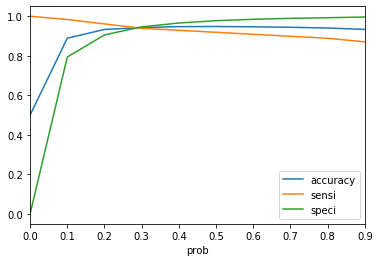

In [37]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [38]:
cutoff = 0.3
y_train_pred = y_train_pred_prob.map( lambda x: 1 if x > cutoff else 0)
y_train_pred

0         0
1         0
2         0
3         0
4         0
         ..
568625    0
568626    1
568627    1
568628    1
568629    1
Length: 568630, dtype: int64

In [39]:
accuracy_score(y_res, y_train_pred)

0.942699118934984

In [40]:
confusion2 = confusion_matrix(y_res, y_train_pred)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives



# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.939148479679229

#### Test Score

In [41]:
y_test_pred_prob = best_model.predict_proba(X_test)
y_test_pred_prob = pd.Series(y_test_pred_prob[:,1])

y_test_pred = y_test_pred_prob.map( lambda x: 1 if x > cutoff else 0)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))

confusion2 = confusion_matrix(y_test, y_test_pred)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: ", TP / float(TP+FN))

Accuracy:  0.9074353662675702
Sensitivity:  0.8986486486486487


### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

k_fold = StratifiedKFold(n_splits=5)

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = k_fold, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 25, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [44]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9977032516750786
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=50, min_samples_split=50)


In [45]:
y_train_pred = grid_search.predict(X_res)
accuracy_score(y_res, y_train_pred)

0.9990503490846421

In [46]:
confusion2 = confusion_matrix(y_res, y_train_pred)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives



# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

1.0

#### Test Score

In [47]:
y_test_pred_prob = best_model.predict_proba(X_test)
y_test_pred_prob = pd.Series(y_test_pred_prob[:,1])

y_test_pred = y_test_pred_prob.map( lambda x: 1 if x > cutoff else 0)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))

confusion2 = confusion_matrix(y_test, y_test_pred)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: ", TP / float(TP+FN))

Accuracy:  0.9074353662675702
Sensitivity:  0.8986486486486487


### XGBoost

In [48]:
from xgboost import XGBClassifier

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 25, 5),
    'min_child_weight':range(1,6,2),
    'criterion': ["entropy", "gini"]
}

k_fold = StratifiedKFold(n_splits=3)

# Instantiate the grid search model
dtree = XGBClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = k_fold, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_res, y_res)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
from imblearn import over_sampling
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.to_numpy()[:X_train_1.shape[0], 0], X_train_smote_1.to_numpy()[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
logistic = LogisticRegression(solver='liblinear')

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.0001, 0.001, 0.01, 0.1, 0.5]
k_fold = StratifiedKFold(n_splits=5)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(logistic, hyperparameters, cv=k_fold, verbose=0)

In [ ]:
best_model = clf.fit(X_train_smote, y_train_smote)

In [ ]:
#View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
y_train_pred_prob = best_model.predict_proba(X_train_smote)
y_train_pred_prob = pd.Series(y_train_pred_prob[:,1])

In [ ]:
draw_roc(y_train_smote, y_train_pred_prob)

In [ ]:
# Let's create columns with different probability cutoffs 
pred_prob_df = pd.DataFrame()
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_prob_df[i]= y_train_pred_prob.map(lambda x: 1 if x > i else 0)
pred_prob_df.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_smote, pred_prob_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(8,4))
plt.show()

In [ ]:
cutoff = 0.35
y_train_pred = y_train_pred_prob.map( lambda x: 1 if x > cutoff else 0)
y_train_pred

In [ ]:
accuracy_score(y_train_smote, y_train_pred)

In [ ]:
confusion2 = confusion_matrix(y_train_smote, y_train_pred)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives



# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

#### Test Score

In [ ]:
y_test_pred_prob = best_model.predict_proba(X_test)
y_test_pred_prob = pd.Series(y_test_pred_prob[:,1])

y_test_pred = y_test_pred_prob.map( lambda x: 1 if x > cutoff else 0)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))

confusion2 = confusion_matrix(y_test, y_test_pred)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: ", TP / float(TP+FN))

### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

k_fold = StratifiedKFold(n_splits=5)

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = k_fold, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
y_train_pred = grid_search.predict(X_train_smote)
accuracy_score(y_train_smote, y_train_pred)

In [ ]:
confusion2 = confusion_matrix(y_train_smote, y_train_pred)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives



# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

#### Test Score

In [ ]:
y_test_pred_prob = best_model.predict_proba(X_test)
y_test_pred_prob = pd.Series(y_test_pred_prob[:,1])

y_test_pred = y_test_pred_prob.map( lambda x: 1 if x > cutoff else 0)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))

confusion2 = confusion_matrix(y_test, y_test_pred)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: ", TP / float(TP+FN))

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)